# Crude oil price prediction using LSTM

### importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing dataset
1.Since data is in form of excel file we have to use pandas read_excel to load the data
2.After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3.Check whether any null values are there or not. if it is present then following can be done, a.Imputing data using Imputation method in sklearn b.Filling NaN values with mean, median and mode using fillna() method
4.Describe data --> which can give statistical analysis

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_1018d2e4a4864523b38030089aa67bd6 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_1018d2e4a4864523b38030089aa67bd6 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_1018d2e4a4864523b38030089aa67bd6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='HKBfBySFuqQ0Ux64EUqcKop9RTMbnj7kJvQCtJq-CYl6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_1018d2e4a4864523b38030089aa67bd6)

body = client_1018d2e4a4864523b38030089aa67bd6.get_object(Bucket='crudeoil-donotdelete-pr-cfqikqy4cw3wk3',Key='Crude Oil Prices Daily.xlsx')['Body']

data = pd.read_excel(body.read())
data.head()


ModuleNotFoundError: No module named 'botocore'

In [3]:
data.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [4]:
data.tail()

,Date,Closing Value
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78
8222,2018-07-09,73.93


In [5]:
data.describe()

,Closing Value
count,8216.000000
mean,43.492139
std,29.616804
min,10.250000
25%,19.577500
50%,29.610000
75%,63.402500
max,145.310000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


# Data Preprocessing

## Checking or null values

In [7]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [8]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [9]:
data.dropna(axis=0,inplace=True)

In [10]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [11]:
data.shape

(8216, 2)

In [12]:
import tensorflow as tf

In [13]:
tf.__version__

'2.4.3'

In [14]:
import tensorflow.keras

In [15]:
tensorflow.keras.__version__

'2.4.0'

### Selecting Closing value column for prediction

NameError: name 'data' is not defined

In [17]:
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

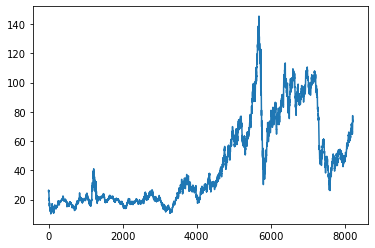

In [18]:
plt.plot(data_oil)

In [19]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [20]:
#Featuring Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

In [21]:
print(data_oil)

[[0.11335703]
 [0.11661484]
 [0.12053902]
 ...
 [0.46497853]
 [0.47038353]
 [0.47149415]]


### splitting dataset into train and test split

In [22]:

training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]


In [23]:
training_size,test_size


(5340, 2876)

In [24]:
train_data

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.37916482],
       [0.38153413],
       [0.38294092]])

In [25]:
train_data.shape

(5340, 1)

In [26]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [27]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
print(X_train.shape), print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [29]:
print(X_test.shape), print(ytest.shape)

(2865, 10)
(2865,)


(None, None)

In [30]:
X_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [31]:
y_train

array([0.10165852, 0.09906708, 0.08203761, ..., 0.37879461, 0.37916482,
       0.38153413])

In [32]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Create the Stacked LSTM model

In [33]:
#tensorflow :open source used for both ML and DL for computation
from tensorflow.keras.models import Sequential#it is a plain stack of layers
from tensorflow.keras.layers import Dense#Dense layer is the regular deeply connected neural network layer
from tensorflow.keras.layers import LSTM #Long Short Trem Memory

In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
#Training the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
84/84 [==============================] - 9s 62ms/step - loss: 0.0052 - val_loss: 0.0013
Epoch 2/50
84/84 [==============================] - 4s 47ms/step - loss: 1.2870e-04 - val_loss: 7.6919e-04
Epoch 3/50
84/84 [==============================] - 4s 44ms/step - loss: 1.2323e-04 - val_loss: 0.0022
Epoch 4/50
84/84 [==============================] - 4s 45ms/step - loss: 1.5153e-04 - val_loss: 7.8180e-04
Epoch 5/50
84/84 [==============================] - 4s 48ms/step - loss: 1.3023e-04 - val_loss: 8.5371e-04
Epoch 6/50
84/84 [==============================] - 4s 48ms/step - loss: 1.4683e-04 - val_loss: 0.0011
Epoch 7/50
84/84 [==============================] - 4s 47ms/step - loss: 1.4306e-04 - val_loss: 9.8078e-04
Epoch 8/50
84/84 [==============================] - 4s 45ms/step - loss: 1.2041e-04 - val_loss: 9.3681e-04
Epoch 9/50
84/84 [==============================] - 4s 45ms/step - loss: 1.1248e-04 - val_loss: 6.7935e-04
Epoch 10/50
84/84 [==============================] - 

In [37]:
## Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [38]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### model evaluation

In [39]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

29.483760053332137

In [40]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

78.43873973239566

## Predict the train and test data and plot the output

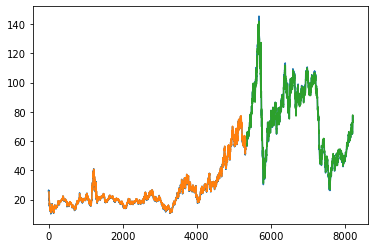

In [41]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(data_oil)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_oil)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_oil)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_oil))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [42]:
import pickle
filehandler = open(b"crude.pickle","wb")
pickle.dump("artifact_content.tar",filehandler)
model.save("crude_oil.h5")

In [43]:
#prediction for next 10 days

In [44]:
len(test_data)

2876

In [45]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [46]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [48]:
len(temp_input)

10

### Predict the future 10 days and plot the graph

In [49]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<10):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.47300243]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.47300243]
1 day output [[0.47479072]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.47300243 0.47479072]
2 day output [[0.476259]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.47300243 0.47479072 0.47625899]
3 day output [[0.4771416]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.47300243 0.47479072 0.47625899 0.47714159]
4 day output [[0.47779065]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.47300243
 0.47479072 0.47625899 0.47714159 0.47779065]
5 day output [[0.47819954]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.47300243 0.47479072
 0.47625899 0.47714159 0.47779065 0.47819954]
6 day output [[0.47848085]]
7 day input [0.46497853 0.47038353 0.47149415 0.47300243 0.47479072 0

In [50]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)

In [51]:
len(data_oil)

8216

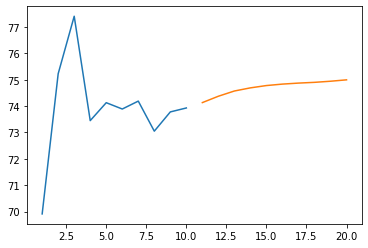

In [52]:
plt.plot(day_new,scaler.inverse_transform(data_oil[8206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

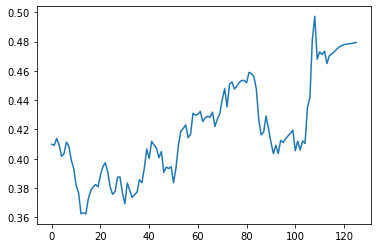

In [53]:
df3=data_oil.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])

In [54]:
df3=scaler.inverse_transform(df3).tolist()

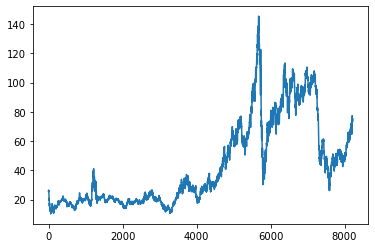

In [55]:
plt.plot(df3)

In [56]:
!pip install ibm_watson_machine_learning

In [57]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                   "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey":"Mp56YZDyCufV9PZv7abM_Z-Cjyikajl4oWjnwf7jJK9e"
}
client = APIClient(wml_credentials)

In [58]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name) ['metadata']['id'])

In [59]:
space_uid = guid_from_space_name(client,'Newspace')
print("Space UID = " +space_uid)

Space UID = 9d325100-ef07-4617-a478-238d1b638146


In [60]:
client.set.default_space(space_uid)

'SUCCESS'

In [61]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [62]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.7_opence")
software_spec_uid

'c2057dd4-f42c-5f77-a02f-72bdbd3282c9'

In [63]:
!tar -zcvf Crudeoil1.tgz crude_oil.h5
model_details = client.repository.store_model(model='Crudeoil1.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Crudeprice",
    client.repository.ModelMetaNames.TYPE:"Tensorflow_2.4",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                             )
model_id = client.repository.get_model_uid(model_details)

crude_oil.h5


In [64]:
model_id

'0a967583-d20f-4af0-9827-220af63882d4'